# News Article Classification - Shreyas Lal

**File Path Confirmation**

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/lib/kaggle/gcp.py
/kaggle/input/intelligence-sig-NLP-Task/sample_submission.csv
/kaggle/input/intelligence-sig-NLP-Task/news_train.csv
/kaggle/input/intelligence-sig-NLP-Task/test.csv
/kaggle/input/dataset/news_train.csv
/kaggle/input/dataset/test.csv


**Import Libraries**

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

**Load the dataset**

In [50]:
df_train = pd.read_csv('/kaggle/input/intelligence-sig-NLP-Task/news_train.csv')
df_test = pd.read_csv('/kaggle/input/intelligence-sig-NLP-Task/test.csv')

# Step 1: Exploratory Data Analysis (EDA)

**Check the first few rows of the train dataset**


In [51]:
print(df_train.head())

   ID                                         News_title  \
0   1  Do men enjoy sex more, or women? The Mahabhara...   
1   2       Why you should eat the Demonetisation laddoo   
2   3            Is the world headed for a new Cold War?   
3   4  Demonetisation is all about Modi, either you'r...   
4   5  Why electoral bonds won't clean up political f...   

                                       News_headline  Category  
0  [Book Extract] From Anushasana Parva, translat...      Arts  
1  One laddoo equals to one lakh in your Jan Dhan...    humour  
2  The battle lines have become very clear with R...  politics  
3  How many times should this hypocritical drama ...  business  
4  Union finance minister Arun Jaitley needs to p...  politics  


**Check the shape of the datasets**

In [52]:
print(f"Train shape: {df_train.shape}")

Train shape: (15576, 4)


In [53]:
print(f"Test shape: {df_test.shape}")

Test shape: (3484, 3)


**Get info on the dataset**

In [54]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15576 entries, 0 to 15575
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             15576 non-null  int64 
 1   News_title     15576 non-null  object
 2   News_headline  15500 non-null  object
 3   Category       15576 non-null  object
dtypes: int64(1), object(3)
memory usage: 486.9+ KB
None


In [55]:
print(df_train.describe())

                 ID
count  15576.000000
mean    7788.500000
std     4496.548232
min        1.000000
25%     3894.750000
50%     7788.500000
75%    11682.250000
max    15576.000000


**Check for missing values**

In [56]:
print(df_train.isnull().sum())

ID                0
News_title        0
News_headline    76
Category          0
dtype: int64


**Visualize Missing Values**

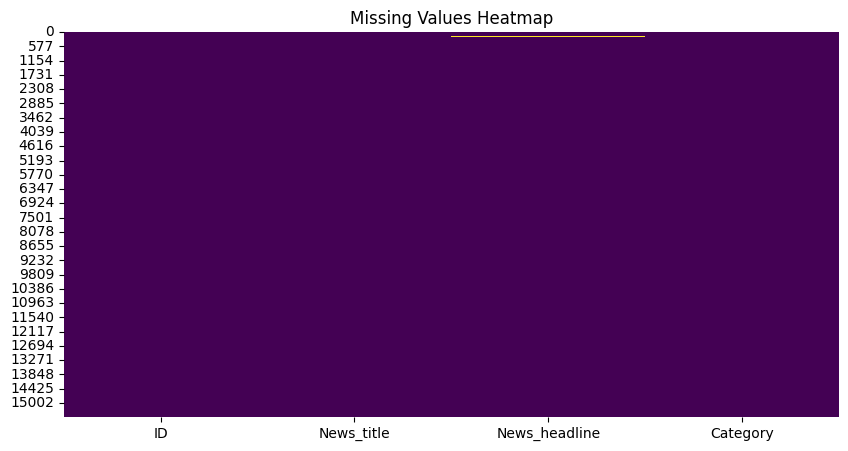

In [57]:
plt.figure(figsize=(10, 5))
sns.heatmap(df_train.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

**Check distribution of categories**

In [58]:
print(df_train['Category'].value_counts())

Category
politics    11519
humour        941
sports        898
Arts          841
tech          728
business      649
Name: count, dtype: int64


**Distribution of Target Classes**

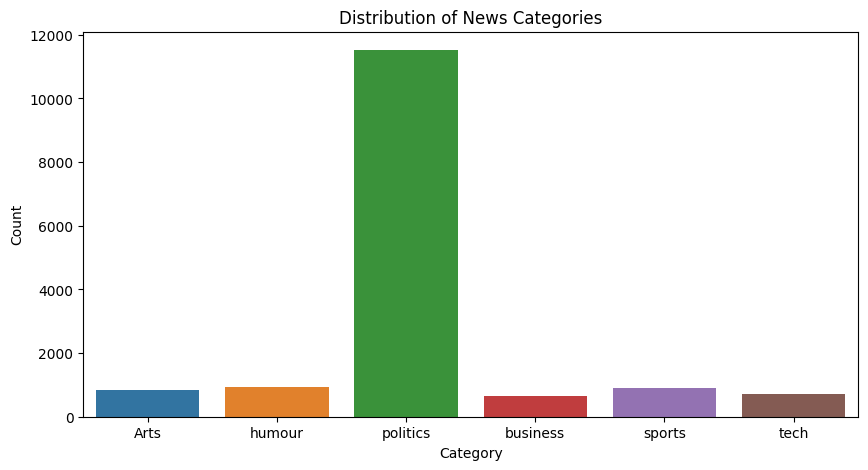

In [59]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_train, x='Category')
plt.title('Distribution of News Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

**Word Cloud from the News_headline**

In [60]:
print(df_train.columns)

Index(['ID', 'News_title', 'News_headline', 'Category'], dtype='object')


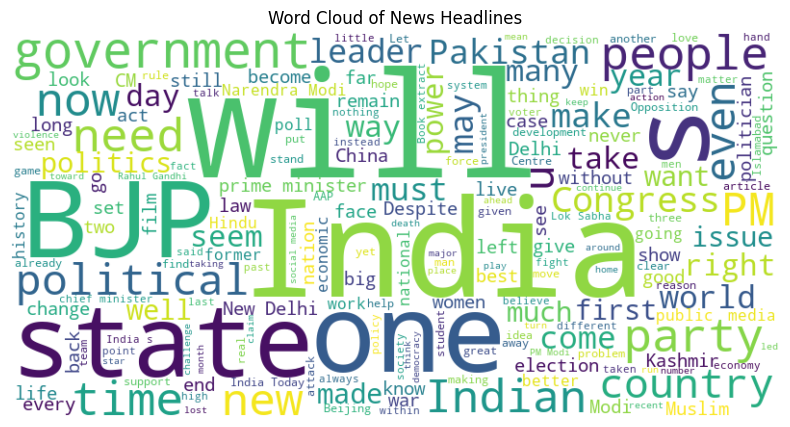

In [61]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Ensure all entries in the News_headline column are strings
df_train['News_headline'] = df_train['News_headline'].astype(str)

# Generate word cloud from the News_headline
plt.figure(figsize=(10, 5))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_train['News_headline']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of News Headlines')
plt.show()

**Text Length Distribution  - News Headline**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


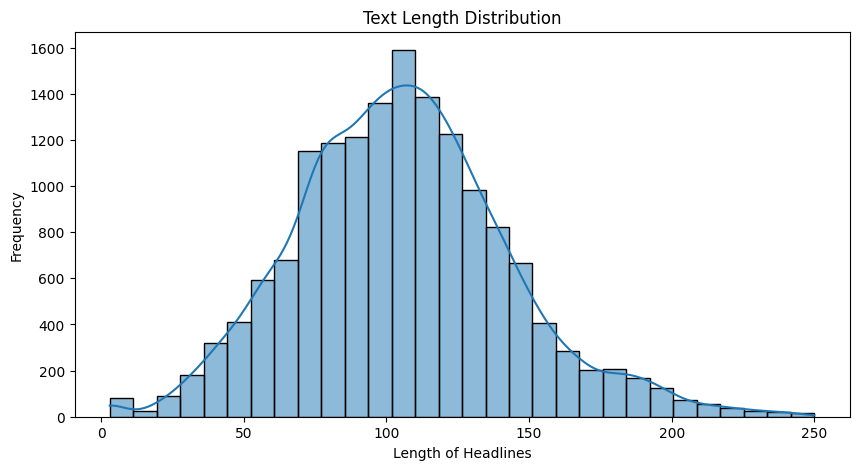

In [62]:
df_train['text_length'] = df_train['News_headline'].apply(len)

plt.figure(figsize=(10, 5))
sns.histplot(df_train['text_length'], bins=30, kde=True)
plt.title('Text Length Distribution')
plt.xlabel('Length of Headlines')
plt.ylabel('Frequency')
plt.show()

**Statistical Analysis**

In [63]:
average_length = df_train['text_length'].mean()
std_deviation = df_train['text_length'].std()
min_length = df_train['text_length'].min()
max_length = df_train['text_length'].max()
median_length = df_train['text_length'].median()

print("Average text length:", average_length)
print("Standard deviation of text length:", std_deviation)
print("Minimum text length:", min_length)
print("Maximum text length:", max_length)
print("Median text length:", median_length)


Average text length: 105.5719696969697
Standard deviation of text length: 37.814197544322
Minimum text length: 3
Maximum text length: 250
Median text length: 104.0


# Step 2: Data Preprocessing

In [64]:
import nltk
from nltk.corpus import stopwords
import string
from sklearn.model_selection import train_test_split
import string
from sklearn.preprocessing import LabelEncoder

**Define a set of stop words**

In [66]:
stop_words = set([
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", 
    "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", 
    "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", 
    "their", "theirs", "themselves", "what", "which", "who", "whom", "this", 
    "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", 
    "being", "have", "has", "had", "having", "do", "does", "did", "doing", 
    "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", 
    "while", "of", "at", "by", "for", "with", "about", "against", "between", 
    "into", "through", "during", "before", "after", "above", "below", "to", 
    "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", 
    "further", "then", "once", "here", "there", "when", "where", "why", 
    "how", "all", "any", "both", "each", "few", "more", "most", "other", 
    "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", 
    "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"
])

**Convert to lowercase, remove punctuation and remove stopwords**

In [67]:
def preprocess_text(text):  
    if isinstance(text, str):  # Ensure input is a string
        # Convert to lowercase
        text = text.lower()
        # Remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))
        # Remove stopwords
        text = ' '.join([word for word in text.split() if word not in stop_words])
        return text
    return ''  # Return empty string for non-string input

**Apply preprocessing to the News_headline column**

In [68]:
df_train['cleaned_headline'] = df_train['News_headline'].apply(preprocess_text)

**Convert categorical labels into numerical values**

In [69]:
label_encoder = LabelEncoder()
df_train['Category'] = label_encoder.fit_transform(df_train['Category'])

**Check the cleaned data and label encoding**

In [70]:
print(df_train[['News_headline', 'cleaned_headline', 'Category']].head())

                                       News_headline  \
0  [Book Extract] From Anushasana Parva, translat...   
1  One laddoo equals to one lakh in your Jan Dhan...   
2  The battle lines have become very clear with R...   
3  How many times should this hypocritical drama ...   
4  Union finance minister Arun Jaitley needs to p...   

                                    cleaned_headline  Category  
0  book extract anushasana parva translated arshi...         0  
1  one laddoo equals one lakh jan dhan account ne...         2  
2  battle lines become clear russia iran supporti...         3  
3  many times hypocritical drama played bother learn         1  
4  union finance minister arun jaitley needs pay ...         3  


# Step 3: Feature Extraction and Model Training 

**Vectorization**

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer

**TF-IDF Vectorizer**

In [72]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(df_train['cleaned_headline'])  # Use cleaned_headline

**Split data into features and target**

In [73]:
X = X_train_tfidf
y = df_train['Category']

# Step 4: Model Training

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score

**Train on the entire training set**

In [76]:
model = LogisticRegression(max_iter=200)
model.fit(X, y)

LogisticRegression(max_iter=200)

**Make predictions on the training set for evaluation**

In [77]:
y_pred = model.predict(X)

**Evaluate the model**

In [78]:
print(f"Weighted F1 Score: {f1_score(y, y_pred, average='weighted')}")
print(classification_report(y, y_pred))

Weighted F1 Score: 0.7974514384981835
              precision    recall  f1-score   support

           0       0.87      0.36      0.51       841
           1       0.86      0.20      0.33       649
           2       0.90      0.24      0.38       941
           3       0.82      0.99      0.90     11519
           4       0.92      0.55      0.69       898
           5       0.96      0.45      0.61       728

    accuracy                           0.83     15576
   macro avg       0.89      0.47      0.57     15576
weighted avg       0.84      0.83      0.80     15576



# Step 5: Test Set Predictions

In [79]:
print(df_test.columns)

Index(['ID', 'News_title', 'News_headline'], dtype='object')


**Apply preprocessing to test data**

In [80]:
df_test['cleaned_headline'] = df_test['News_headline'].apply(preprocess_text)

**Transform the test data using the same vectorizer**

In [81]:
X_test_tfidf = vectorizer.transform(df_test['cleaned_headline'])

**Make predictions on the test set**

In [83]:
test_predictions = model.predict(X_test_tfidf)

**DataFrame for submission**

In [84]:
submission_df = pd.DataFrame({
    'ID': df_test['ID'],  # Include IDs from the test set
    'Category': test_predictions  # Predictions for the categories
})

**First few rows of the submission DataFrame**

As per the following : 
* 0: Arts
* 1: Business
* 2: Humor
* 3: Politics
* 4: Sports
* 5: Tech

In [86]:
print(submission_df.head())

   ID  Category
0   1         3
1   2         3
2   3         3
3   4         3
4   5         3


In [91]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
print(submission_df)

        ID  Category
0        1         3
1        2         3
2        3         3
3        4         3
4        5         3
5        6         2
6        7         4
7        8         0
8        9         3
9       10         3
10      11         3
11      12         1
12      13         2
13      14         3
14      15         3
15      16         5
16      17         5
17      18         3
18      19         3
19      20         3
20      21         3
21      22         3
22      23         3
23      24         3
24      25         3
25      26         3
26      27         3
27      28         3
28      29         3
29      30         3
30      31         3
31      32         3
32      33         3
33      34         0
34      35         3
35      36         3
36      37         3
37      38         3
38      39         3
39      40         3
40      41         3
41      42         3
42      43         3
43      44         3
44      45         3
45      46         3
46      47   

**Save the submission DataFrame to a CSV file**

In [96]:
submission_df.to_csv('my_submission.csv', index=False)

**Reading back the submission file to verify its contents**

In [88]:
submission_check = pd.read_csv('my_submission.csv')

   ID  Category
0   1         3
1   2         3
2   3         3
3   4         3
4   5         3


# Visualizing the Outcome

**Count the occurrences of each predicted category**

In [98]:
predicted_category_counts = submission_df['Category'].value_counts()
predicted_category_counts

Category
3    3232
4      81
5      69
0      53
1      30
2      19
Name: count, dtype: int64

**Bar plot**

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '3'),
  Text(1, 0, '4'),
  Text(2, 0, '5'),
  Text(3, 0, '0'),
  Text(4, 0, '1'),
  Text(5, 0, '2')])

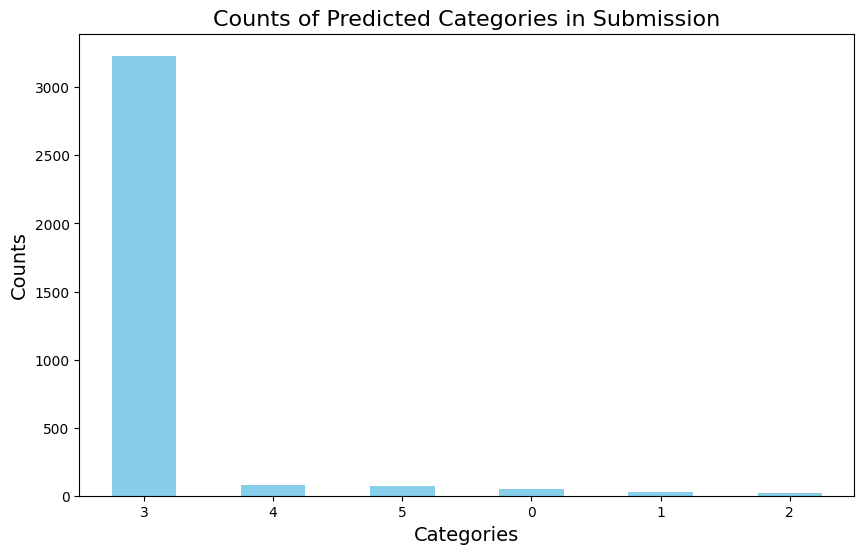

In [99]:
plt.figure(figsize=(10, 6))
predicted_category_counts.plot(kind='bar', color='skyblue')

plt.title('Counts of Predicted Categories in Submission', fontsize=16)
plt.xlabel('Categories', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.xticks(rotation=0)  # Rotates the x-axis labels for better readability